In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Generate sine wave data
def generate_sine_wave(num_points, range_start, range_end, freq, amplitude, phase):
    x = np.linspace(range_start, range_end, num_points)
    y = amplitude * np.sin(2 * np.pi * freq * x + phase)
    return x, y

In [3]:
# Parameters for the sine wave
num_points = 1000
range_start = 0
range_end = 6 * np.pi
freq = 0.5
amplitude = 1
phase = np.pi / 4

In [4]:
# Generate the data
x_data, y_data = generate_sine_wave(num_points, range_start, range_end, freq, amplitude, phase)

In [5]:
# Function to create dataset for RNN
def create_dataset(X, n_steps):
    Xs, ys = [], []
    for i in range(len(X) - n_steps):
        Xs.append(X[i:(i + n_steps)])
        ys.append(X[i + n_steps])
    return np.array(Xs), np.array(ys)

In [6]:
# Data preparation parameters
n_steps = 50
x_data, y_data = create_dataset(y_data, n_steps)

In [7]:
# Build the RNN model
model = Sequential([
    SimpleRNN( 120, input_shape=(n_steps, 1)),  # SimpleRNN layer with 120 neurons
    Dense(1)                                  # Fully connected layer with 1 output neuron
])

C:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [9]:
# Reshape data for the SimpleRNN layer
x_data_reshaped = x_data.reshape((x_data.shape[0], x_data.shape[1], 1))

In [10]:
# Train the model
history = model.fit(x_data_reshaped, y_data, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0331 - val_loss: 1.9392e-04
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2955e-05 - val_loss: 2.6600e-05
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3679e-05 - val_loss: 1.1804e-05
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.3160e-06 - val_loss: 3.4476e-06
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8087e-06 - val_loss: 3.0403e-06
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.0707e-06 - val_loss: 2.5425e-06
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.9851e-06 - val_loss: 1.8424e-06
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3210e-06 - val_loss: 3.7026e-06
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6497e-06 - val_loss: 2.1105e-06
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0540e-06 - val_loss: 2.9004e-06
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.46

In [11]:
# Make predictions
predictions = model.predict(x_data_reshaped)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


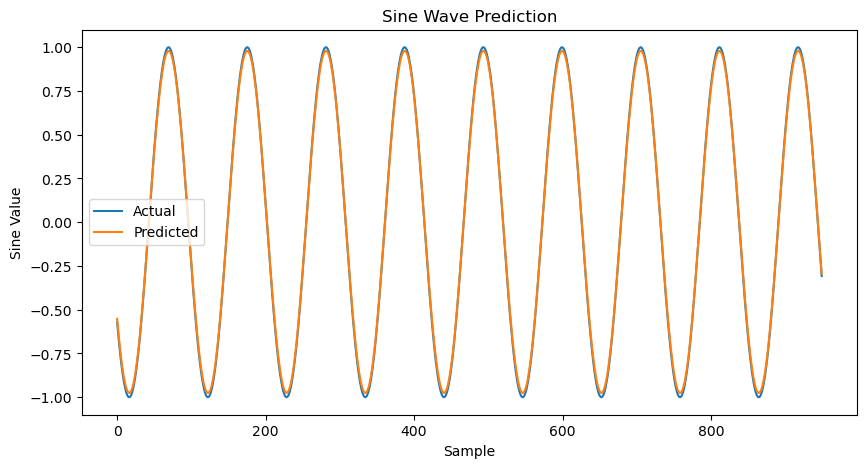

In [12]:
# Plot predictions vs actual data
plt.figure(figsize=(10, 5))
plt.plot(y_data, label='Actual')
plt.plot(predictions[:, 0], label='Predicted')
plt.title('Sine Wave Prediction')
plt.xlabel('Sample')
plt.ylabel('Sine Value')
plt.legend()
plt.show()

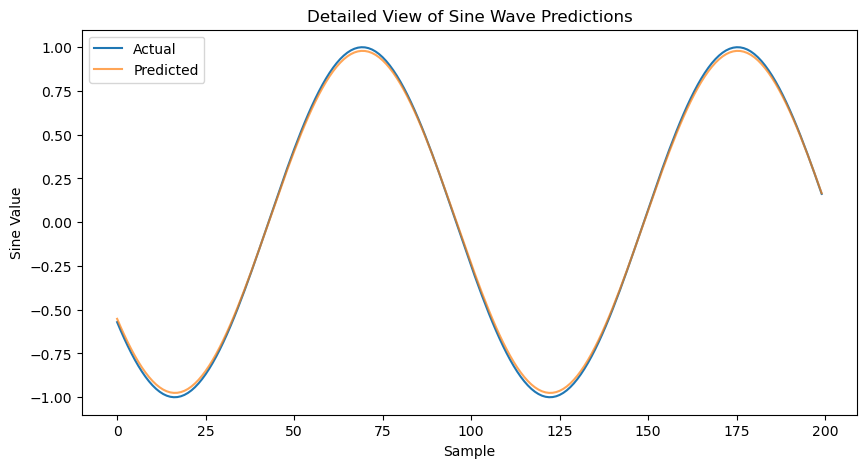

In [13]:
# Detailed view of the prediction overlay
plt.figure(figsize=(10, 5))
plt.plot(y_data[:200], label='Actual')
plt.plot(predictions[:200, 0], label='Predicted', alpha=0.7)
plt.title('Detailed View of Sine Wave Predictions')
plt.xlabel('Sample')
plt.ylabel('Sine Value')
plt.legend()
plt.show()

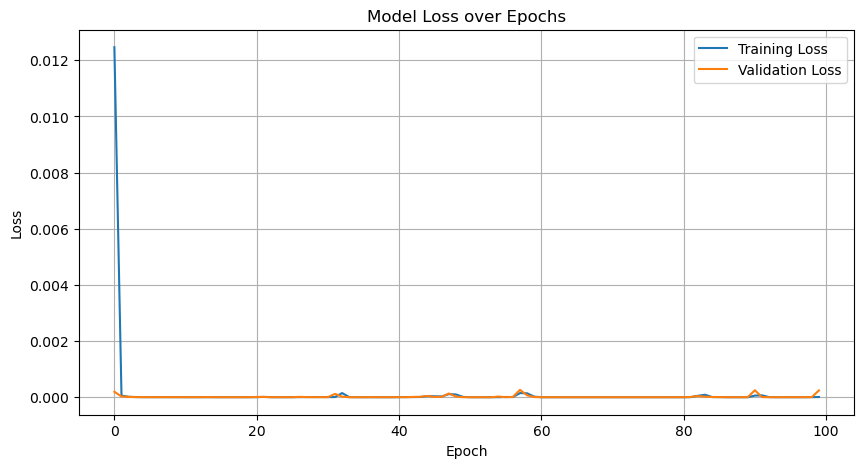

In [14]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

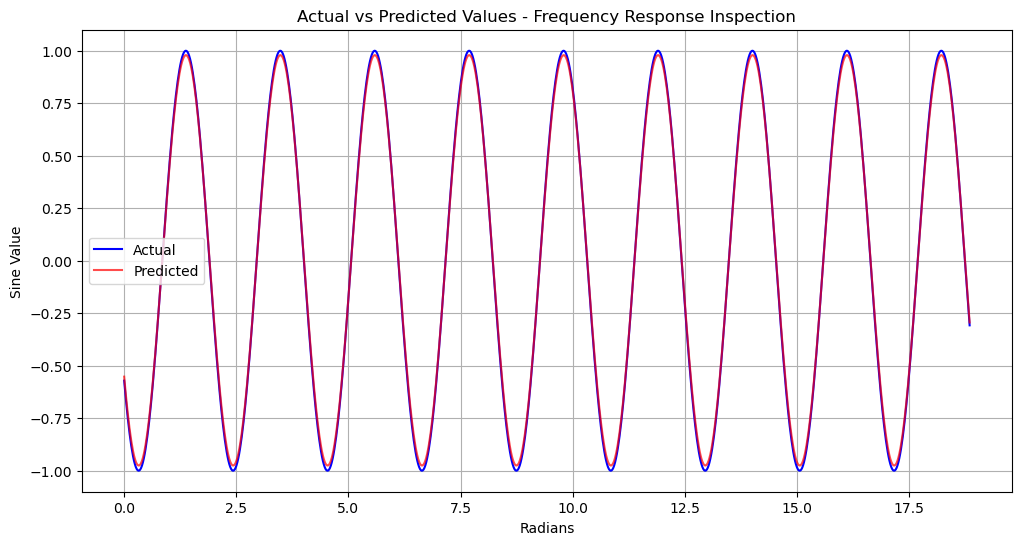

In [15]:
# Plotting actual vs predicted values to inspect frequency response
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, 6 * np.pi, len(y_data)), y_data, label='Actual', color='blue')
plt.plot(np.linspace(0, 6 * np.pi, len(predictions)), predictions[:, 0], label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Values - Frequency Response Inspection')
plt.xlabel('Radians')
plt.ylabel('Sine Value')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Calculate residuals
residuals = y_data - predictions[:, 0]

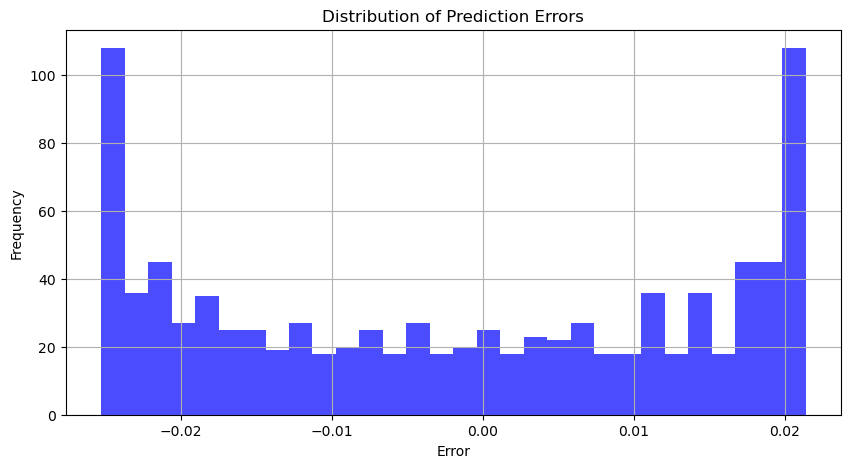

In [17]:
# Plotting the residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

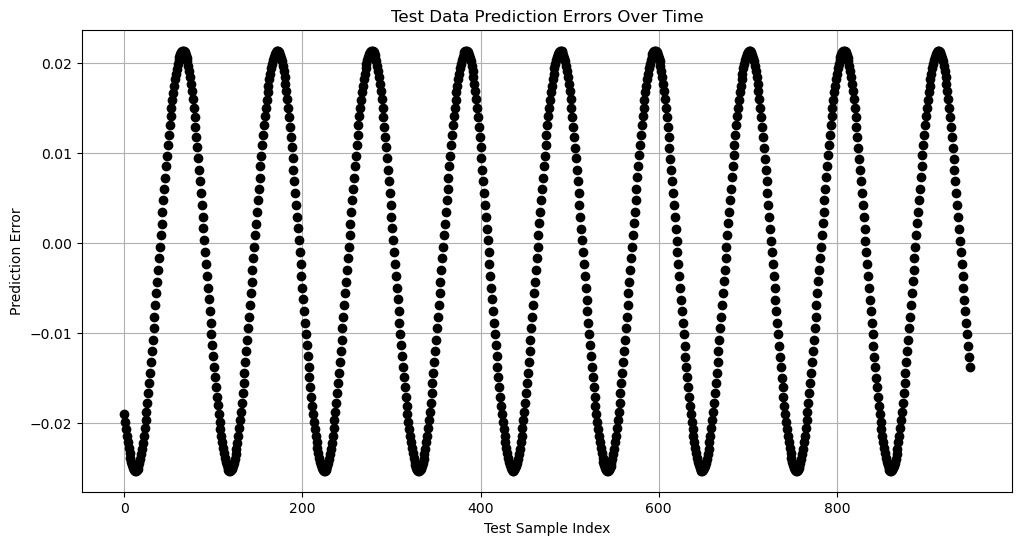

In [18]:
# Plotting residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals, marker='o', linestyle='', color='black')
plt.title('Test Data Prediction Errors Over Time')
plt.xlabel('Test Sample Index')
plt.ylabel('Prediction Error')
plt.grid(True)
plt.show()